#Exploratory Data Analysis - Retail


Objectives:-
1) To Perform Exploratory Data Analysis
2) Find out business problems
3) identify key areas for improving profits.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

Importing Dataset

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Correlation Between Variables.
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


check missing values

In [7]:
#Checking Missing Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
Initial_Shape = df.shape
Initial_Shape

(9994, 13)

In [9]:
df.drop_duplicates(keep= 'first',inplace=True)

In [10]:
#Final Shape of the dataframe
Final_Shape = df.shape
Final_Shape

(9977, 13)

Here there where no duplicate rows so no difference
# Exploratory Data Analysis and Visulization
1 What are total Sales and Profits of the company?

In [11]:
s = df['Sales'].sum()
p = df['Profit'].sum()
print("Total sales in US is",s)
print("Total profit in US is",p)

Total sales in US is 2296195.5903
Total profit in US is 286241.4226


In [12]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [13]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [14]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

#Top ten states by sales are -:
'California', 'New York', 'Washington', 'Michigan', 'Virginia', 'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
#Top ten states by Profit are -:
'California', 'New York', 'Washington', 'Michigan', 'Virginia', 'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'¶

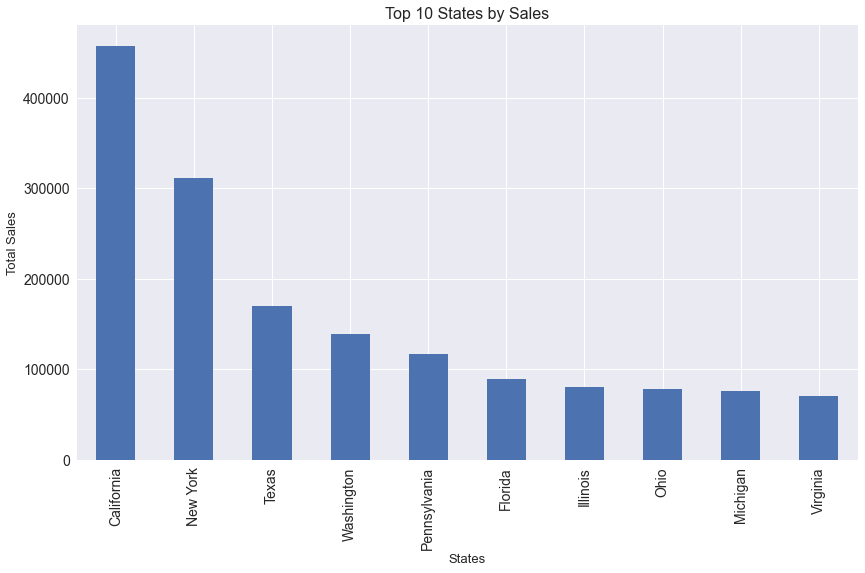

In [15]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

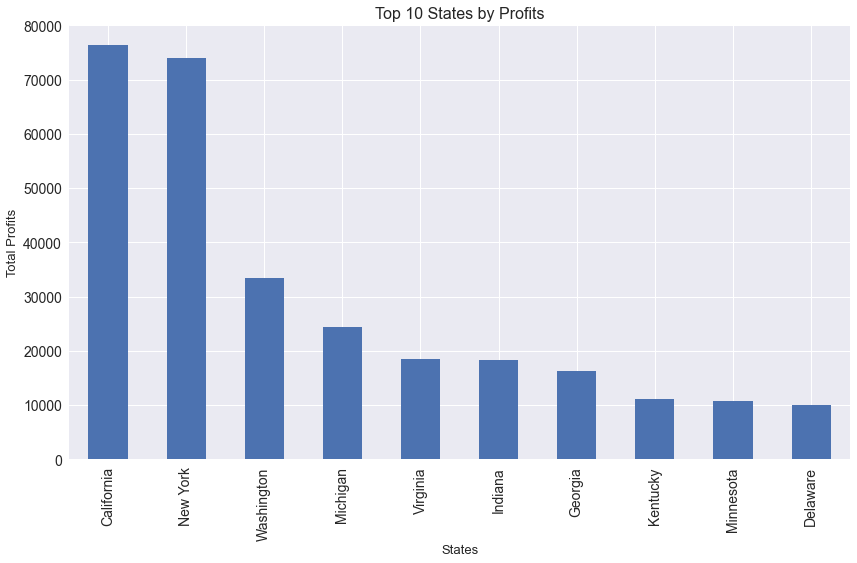

In [16]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

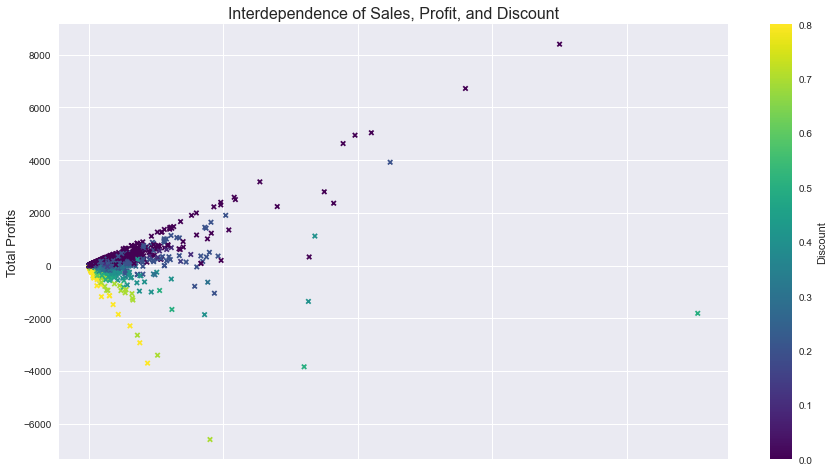

In [17]:
plt.style.use('seaborn')
df.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")

# here c should contain the col name with which we want our scale to be made of

plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

Lets make a pair plot to do Relational analysis

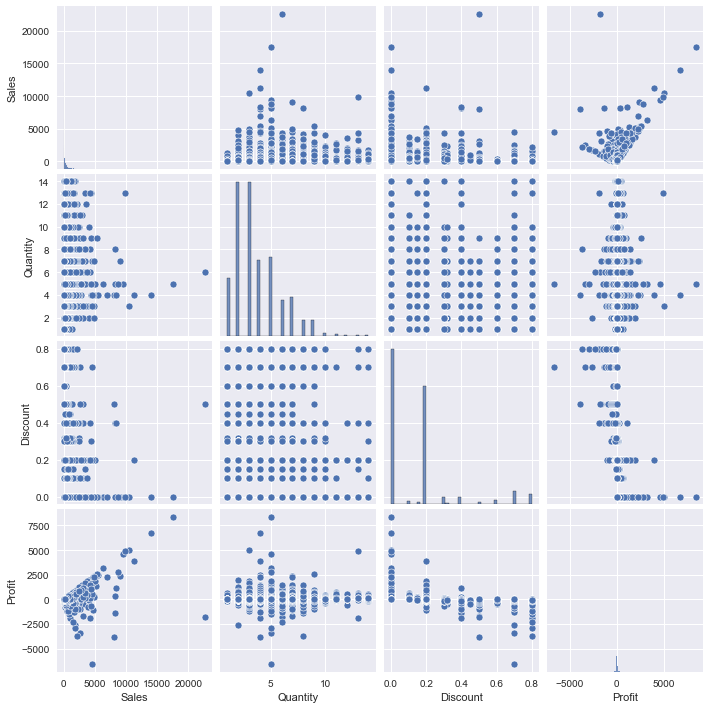

In [18]:
financial=df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit. Now To see what exact relation between those entities we plot the heat_map. so we get more clearity

<AxesSubplot:>

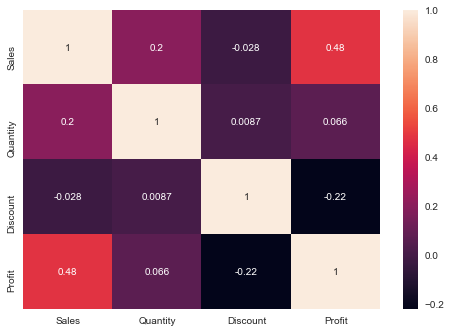

In [19]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

We can also see the correlation by -:

In [20]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


##From the above analysis we see that
##From Above map we can infer that -:
1)sales and profits are positively correlated
2)Discount and Profits are Negatively correlated
Hence we consider these cases and proceed further

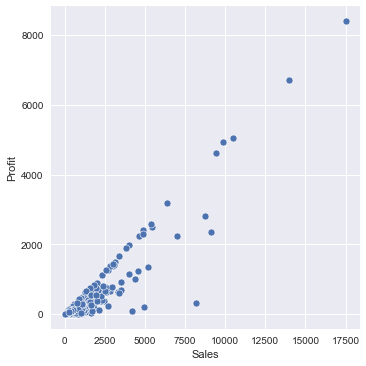

In [21]:
data=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

Hence we say that inspite having 0 discount there is a positive relation between Profit and sales. Now we plot heat_map to get correlaton

<AxesSubplot:>

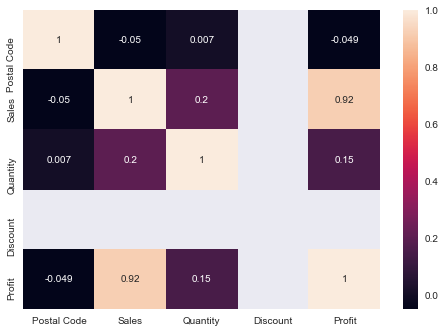

In [22]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Hence, we see that There is strong correlation between sales and Profit i.e 0.92

In [23]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.050025,0.007045,NaN,-0.049048
Sales,-0.050025,1.000000,0.200736,NaN,0.921153
Quantity,0.007045,0.200736,1.000000,NaN,0.148076
Discount,NaN,NaN,NaN,NaN,NaN
Profit,-0.049048,0.921153,0.148076,NaN,1.000000


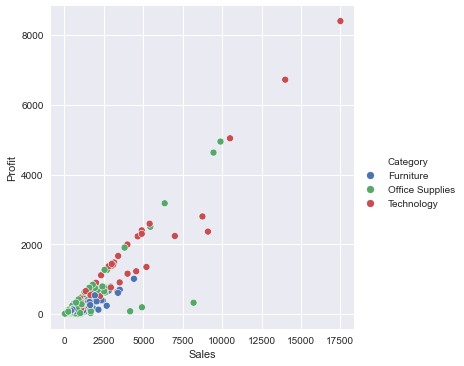

In [24]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

C:\Users\dimple\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

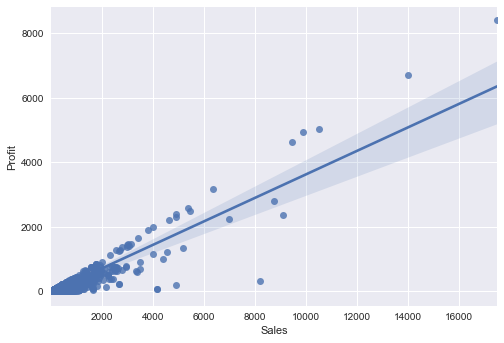

In [25]:
# Regression Plot 
sns.regplot(data['Sales'],data['Profit'])

##We notice that
There is positive trend between Profit and sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

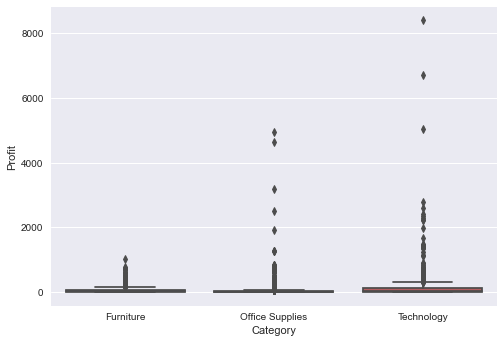

In [26]:
sns.boxplot(x='Category',y='Profit',data=data)

We will proceed similar as we proceed above when discount = 0

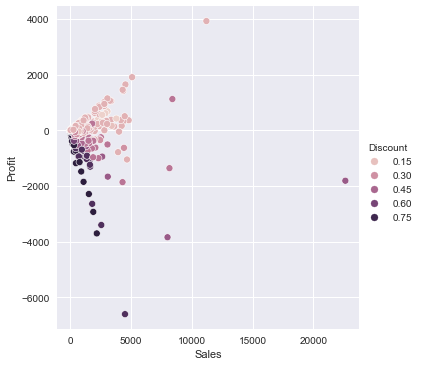

In [27]:
data1=df[df['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases
###Now we check how it can be effects on different sectors of businesses

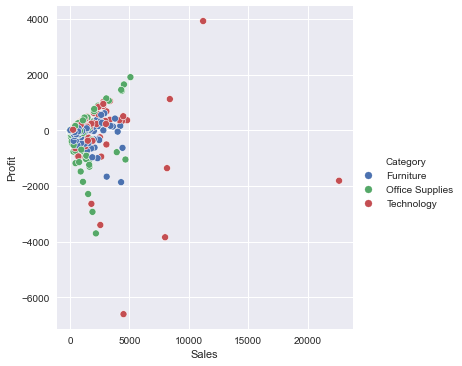

In [28]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

<AxesSubplot:>

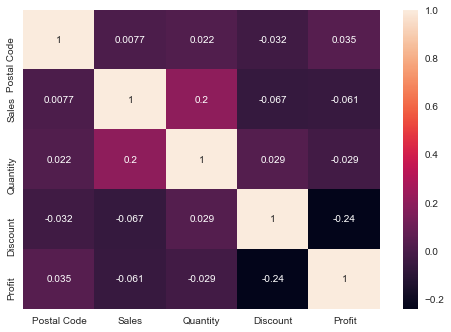

In [29]:
#realtion analysis
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [30]:
data1.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.007691,0.021891,-0.032173,0.034911
Sales,0.007691,1.000000,0.201128,-0.066800,-0.060758
Quantity,0.021891,0.201128,1.000000,0.028675,-0.028940
Discount,-0.032173,-0.066800,0.028675,1.000000,-0.243734
Profit,0.034911,-0.060758,-0.028940,-0.243734,1.000000


###Here we saw that even though we increse the discount the profit is not increasing.

<AxesSubplot:xlabel='Sub-Category'>

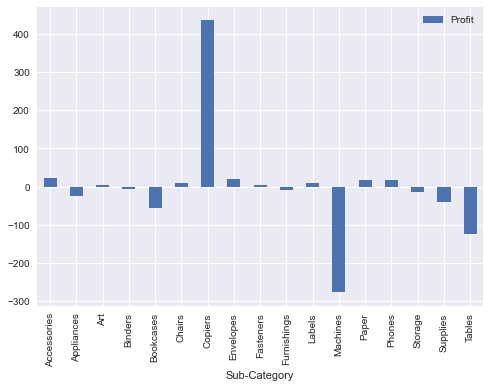

In [31]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

##Here we see that copiers had highest Profit and Machines had highest loss

<AxesSubplot:xlabel='Sub-Category'>

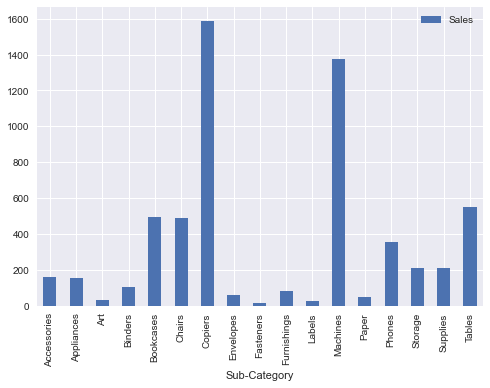

In [32]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

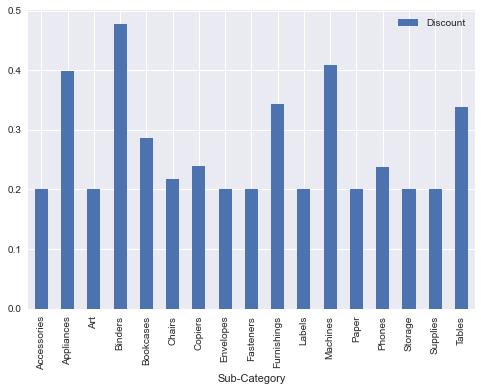

In [33]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Discount')
pivot.plot(kind='bar')

From the above graph we can see that even we gave the maximum discounts in Binders at first position and Machines at the secound position in max discount still we have huge losses in these product

In above two graph we see that 'Machines' had second highest sale but due to large discount it is in loss and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses</p></font></b>

#So from the Analysis we can say that Discounts are triggering losses

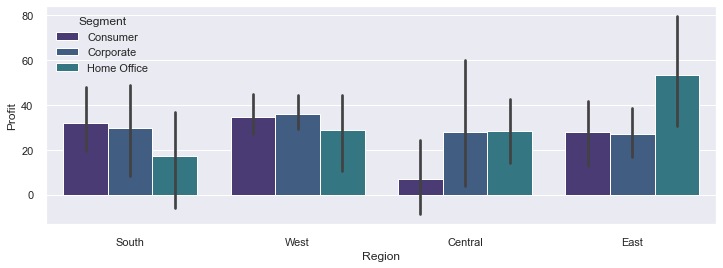

In [34]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

#Overall each Segment is profitable.
Profit distribution by Region

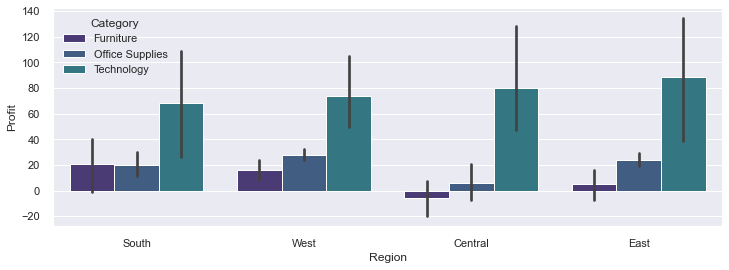

In [35]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")

# Hue is one of the main properties (called color appearance parameters)
# of a color, defined technically
plt.show()

Here we see that "Furniture" Category is the only loss making sector that to only in Central Region
</b>

In [36]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(df.groupby("Region"))[0][1]

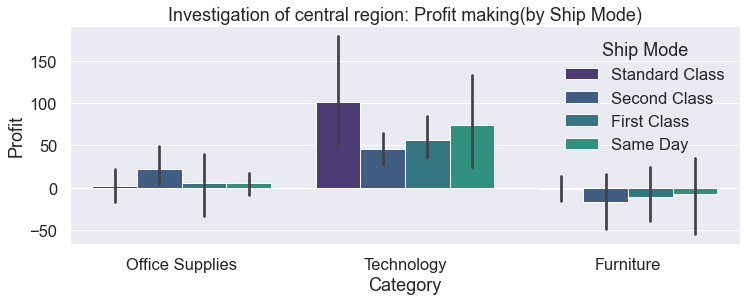

In [37]:
# Investing Further in cenral Region
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

In [38]:
 #Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(df.groupby("Region"))[0][1].groupby("Category"))[0][1]

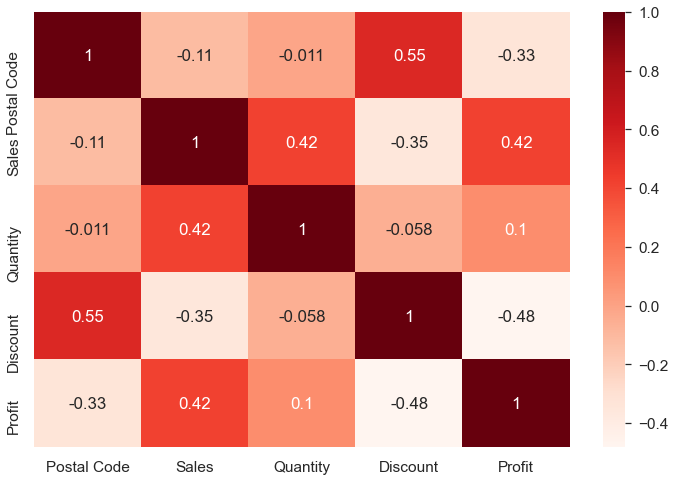

In [39]:
# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

There is unusually high positive correlation between Postal Code and Discount Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values... i.e. they are not helping in improving sales of "Furniture" category of the company Investigating individual performance by states in the central region

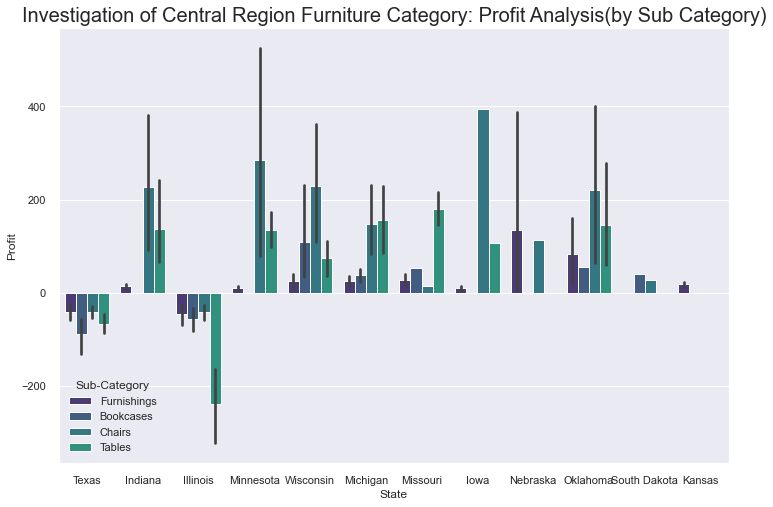

In [40]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

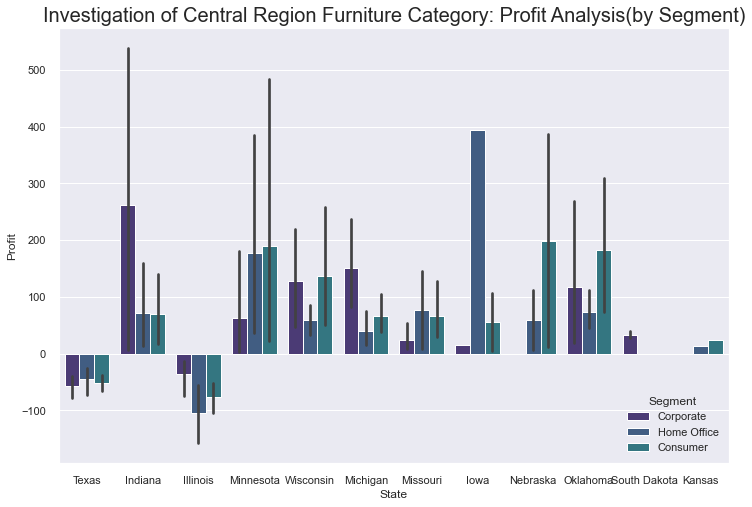

In [41]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

So, what is it they are doing diffrently?

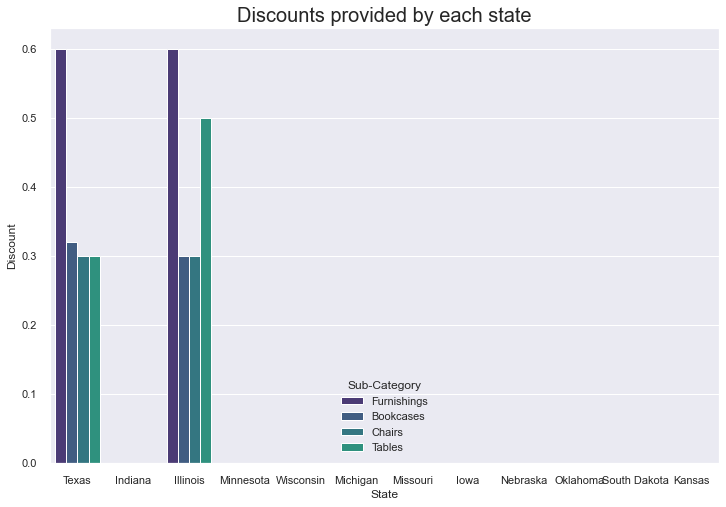

In [42]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

###Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.
Also, these discounts are very high!
1. 60% on Furnishings
2. 30% on Bookcases and Chairs
3. 50% disount on Tables in Illinois and 30% in Texas
4. Are these discounts driving sales up?.... NO!

<Figure size 864x576 with 0 Axes>

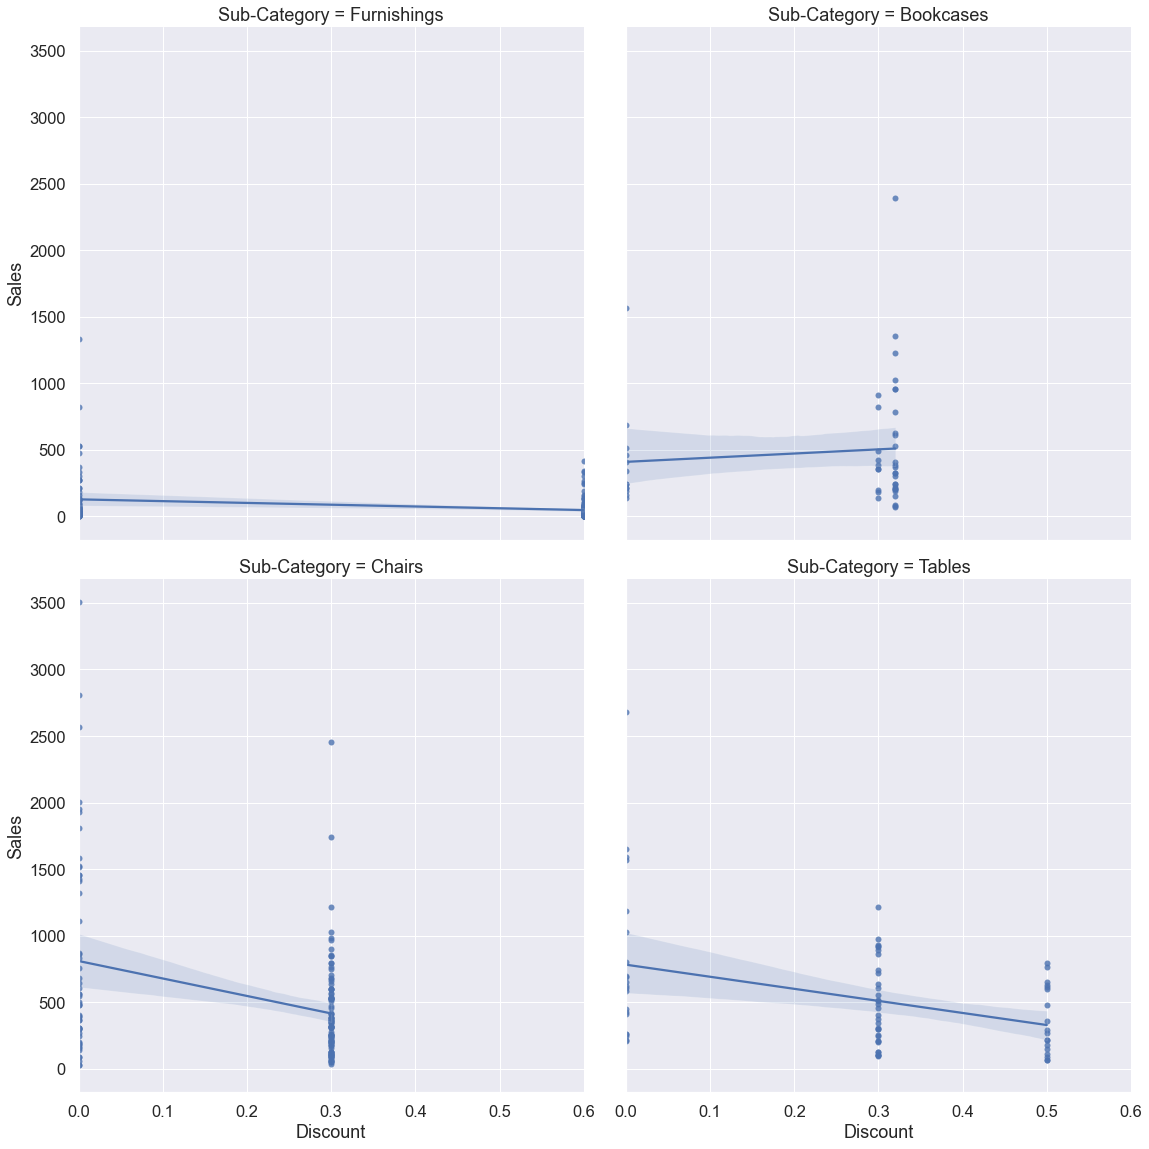

In [43]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

<AxesSubplot:xlabel='Category', ylabel='Profit'>

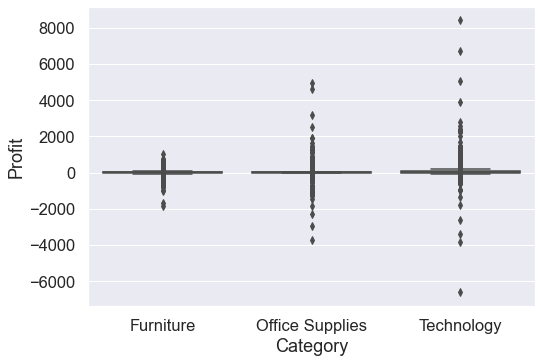

In [44]:
# box plot
sns.boxplot(x='Category',y='Profit',data=df)

We see that variation in Technology sector is more as compared to other two sector

<AxesSubplot:xlabel='Category'>

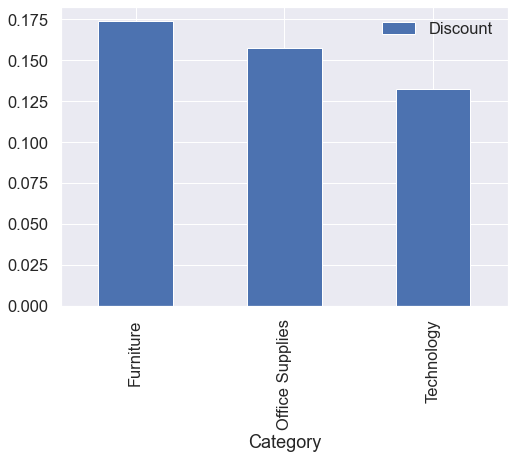

In [45]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

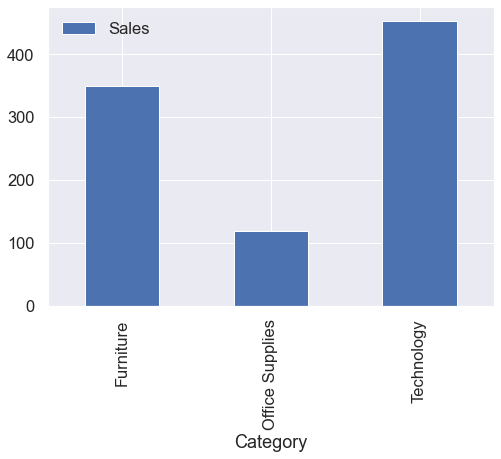

In [46]:
pivot=pd.pivot_table(df,index='Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

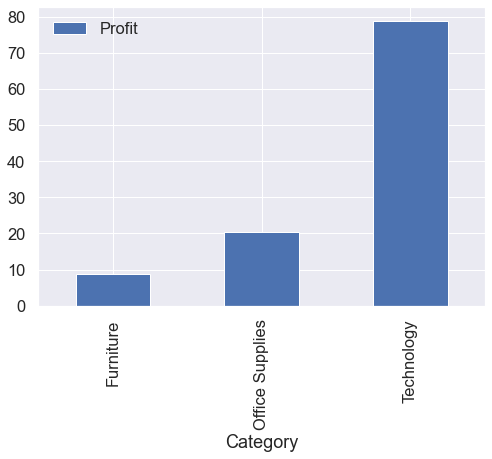

In [47]:
pivot=pd.pivot_table(df,index='Category',values='Profit')
pivot.plot(kind='bar')

1) More Discount is given in Furniture category and less Discount is given in Technology category businesses

2) Sales of Technology category businesses are more as compared to Furniture category

3) Profit of Technology category businesses are more as compared to Furniture category

Insights from Exploratory Data Analysis (Summary)




1) What are total Sales and Profits of the company?



Total Sales = 2,296,195.56 USD Total Profits = 286,241.42 USD

2)Top 10 States by Sales and Profits

Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
Californi and New York are far ahead of their competitor states in terms of Profits.
Discounts are triggering losses.
3) Distrubution of Profits across diffrent regions

Overall each Segment is profitable.


4) Profit distribution by Region "Furniture" Category is the only loss making sector that to only in Central Region

5) Investigating losses in Furniture category in the Central region Losses are inccured in Furniture Cateory irrespective to ship mode There is unusually high positive correlation between Postal Code and Discount Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values...i.e. they are not helping in improving sales of "Furniture" category of the company

6) Investigating individual performance by states in the central region

Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region

Losses in Tables Sub Category is significanlty high.

7) So, what is it they are doing diffrently? Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts. Also, these discounts are crazy high!

60% on Furnishings 30% on Bookcases and Chairs 50% disount on Tables in Illinois and 30% in Texas

8) Are these discounts driving sales up?.... NO! Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

</font>
From All these analysis we finally conclude that

1) If we give more Discount on products our sales goes increses but Profit get down.

2) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.

3) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.

4) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.

5) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City. 6) To rise the profits , we first need to sell consumer segment products more .

7) For enhancing the profits , we need to sell more to the states which are liking our products like NEWYORK and CALIFORNIA .

Hence To get good profit in any business you have to focus on increasing sales but not giving more discount


